# Import Libraries


In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

# Data Represenation

In [45]:
df=pd.read_csv("C:/Users/MINA/Downloads/hypertension_data.csv/hypertension_data.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0  1.0   3       145   233    1        0      150      0      2.3   
1  64.0  0.0   2       130   250    0        1      187      0      3.5   
2  52.0  1.0   1       130   204    0        0      172      0      1.4   
3  56.0  0.0   1       120   236    0        1      178      0      0.8   
4  66.0  0.0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [47]:
df.describe()

age          sex            cp      trestbps          chol  \
count  26083.000000  26058.00000  26083.000000  26083.000000  26083.000000   
mean      55.661389      0.50000      0.958594    131.592992    246.246061   
std       15.189768      0.50001      1.023931     17.588809     51.643522   
min       11.000000      0.00000      0.000000     94.000000    126.000000   
25%       44.000000      0.00000      0.000000    120.000000    211.000000   
50%       56.000000      0.50000      1.000000    130.000000    240.000000   
75%       67.000000      1.00000      2.000000    140.000000    275.000000   
max       98.000000      1.00000      3.000000    200.000000    564.000000   

                fbs       restecg       thalach         exang       oldpeak  \
count  26083.000000  26083.000000  26083.000000  26083.000000  26083.000000   
mean       0.149753      0.526512    149.655024      0.326573      1.039512   
std        0.356836      0.525641     22.858109      0.468969      1.165138   
min        0.000000      0.000000     71.000000      0.000000      0.000000   
25%        0.000000      0.000000    133.000000      0.000000      0.000000   
50%        0.000000      1.000000    153.000000      0.000000      0.800000   
75%        0.000000      1.000000    166.000000      1.000000      1.600000   
max        1.000000      2.000000    202.000000      1.000000      6.200000   

              slope            ca          thal        target  
count  26083.000000  26083.000000  26083.000000  26083.000000  
mean       1.400299      0.721849      2.318752      0.547253  
std        0.616513      1.011608      0.604659      0.497772  
min        0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      2.000000      0.000000  
50%        1.000000      0.000000      2.000000      1.000000  
75%        2.000000      1.000000      3.000000      1.000000  
max        2.000000      4.000000      3.000000      1.000000

# Check Nulls and Duplicated

In [48]:
df.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [49]:
df.duplicated().sum()

0

# Handel Missing Values

In [50]:
df["sex"]=df["sex"].fillna(df["sex"].median())
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Check Outliers

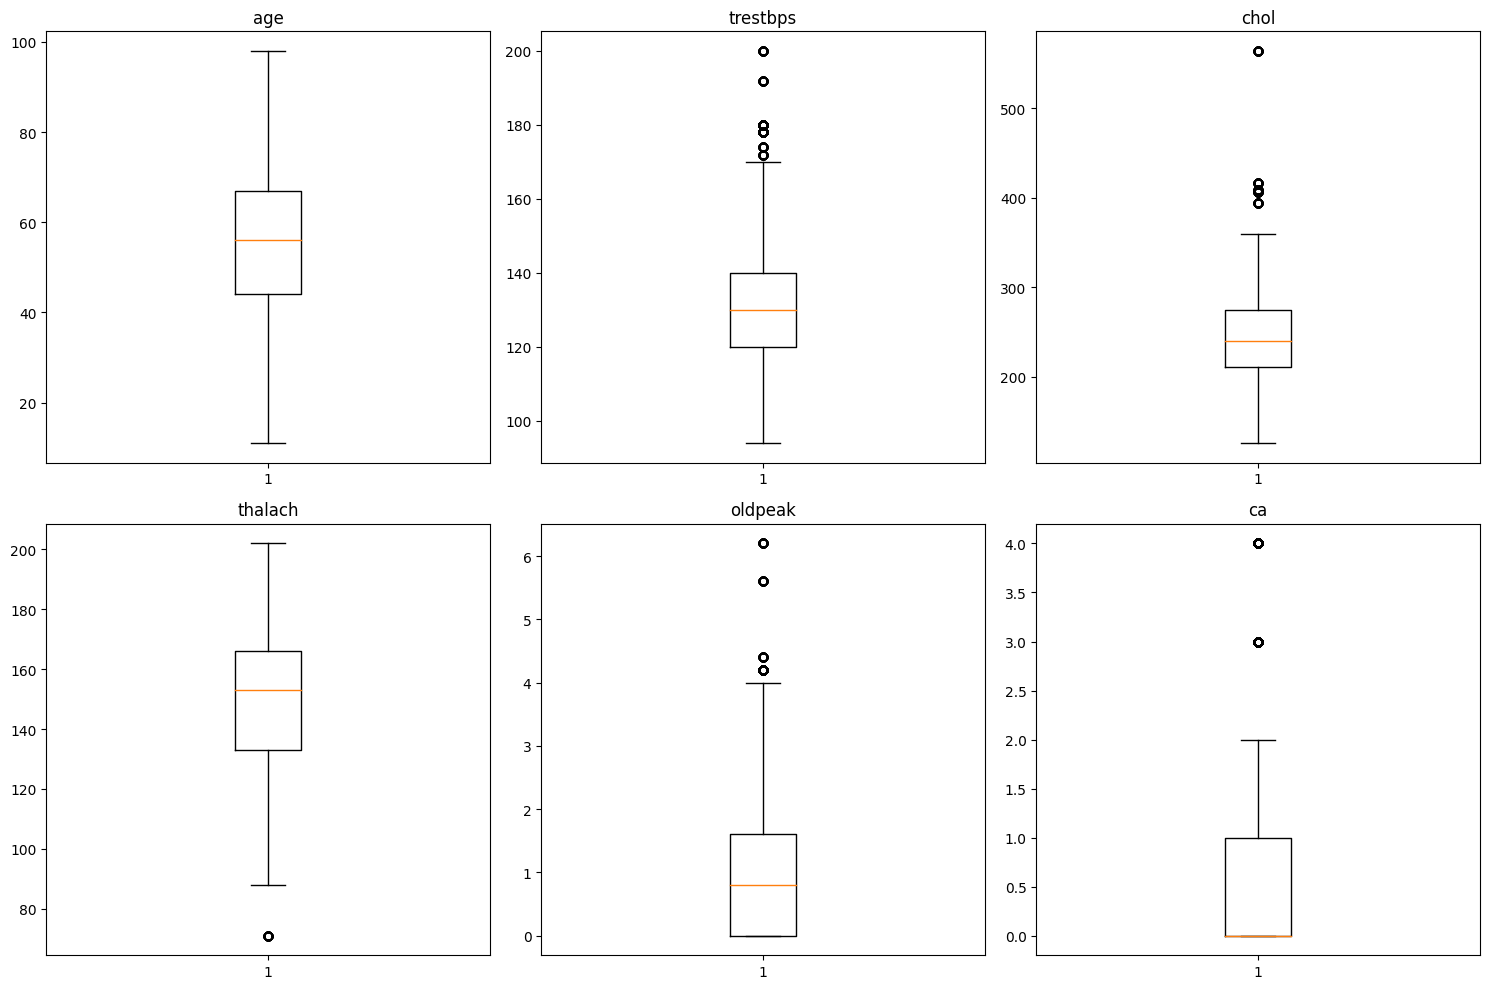

In [51]:
x=["age","trestbps","chol","thalach","oldpeak","ca"]
plt.figure(figsize=(15,10))
for i in x:
    plt.subplot(2,3,x.index(i)+1)
    plt.boxplot(df[i])
    plt.title(i)
plt.tight_layout()
plt.show()    


# No Outlier Values this values is in Normal Life 

# Exploarity Data Analysis

# ***Bivarate Analysis***

In [52]:
df["age"].describe()

count    26083.000000
mean        55.661389
std         15.189768
min         11.000000
25%         44.000000
50%         56.000000
75%         67.000000
max         98.000000
Name: age, dtype: float64

In [53]:
fig = px.histogram(df, x="age", 
                   nbins=20, 
                   title="Age Distribution", 
                   color_discrete_sequence=["#2C3E50"], 
                   opacity=0.75) 
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    title_font_size=20,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    bargap=0.1,
)

fig.show()

In [54]:
df = df[df["sex"] != 0.5]
sex_counts=df["sex"].value_counts()
sex_labels = {0: "Female", 1: "Male"}  
sex_counts.index = sex_counts.index.map(sex_labels)

sex_counts

Male      13029
Female    13029
Name: sex, dtype: int64

In [55]:
p = px.bar(
    data_frame=df,
    x=sex_counts.index.astype(str),  
    y=sex_counts.values,
    color=sex_counts.index, 
    color_discrete_sequence=["#2C3E50", "#EF553B"], 
    title="Distribution of Sex in Hypertension Dataset",
    labels={"x": "Sex", "y": "Count"},  
    text_auto=True )

p.update_layout(
    xaxis_title="Sex Category",
    yaxis_title="Count",
    template="plotly_dark",
    font=dict(size=14),
    bargap=0.2 
)

p.show()


In [56]:
cp_count=df["cp"].value_counts()
cp_label={0:"Asymptomatic",1:"Typical Angina",2:"Atypical Angina",3:"Non-anginal Pain"}
cp_count.index=cp_count.index.map(cp_label)
cp_count

Asymptomatic        12314
Atypical Angina      7392
Typical Angina       4456
Non-anginal Pain     1896
Name: cp, dtype: int64

In [57]:
g=px.bar(data_frame=df,x=cp_count.index.astype(str),y=cp_count.values,color=cp_count.index,color_discrete_sequence=["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728"],
         title="Distribution of Chest Pain type in Hypertension Dataset",   labels={"x": "cp", "y": "Count"},  
    text_auto=True)
g.update_layout(
    xaxis_title="Chest Pain type",
    yaxis_title="Count",
    template="plotly_dark",
    font=dict(size=14),
    bargap=0.2 

)
g.show()


In [58]:
df["trestbps"].describe()

count    26058.000000
mean       131.590682
std         17.597086
min         94.000000
25%        120.000000
50%        130.000000
75%        140.000000
max        200.000000
Name: trestbps, dtype: float64

In [59]:

fig = px.histogram(df, x="trestbps", nbins=30, histnorm="density",
                   title="Distribution of Resting Blood Pressure",
                   labels={"trestbps": "Resting Blood Pressure (mmHg)", "y": "Density"},
                   color_discrete_sequence=["#2C3E50"])


fig.update_layout(
    xaxis_title="Resting Blood Pressure",
    yaxis_title="Densty",
    title_font_size=20,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),


    bargap=0.1,
)
fig.show()


In [60]:
df["chol"].describe()

count    26058.000000
mean       246.286591
std         51.651701
min        126.000000
25%        211.000000
50%        240.000000
75%        275.000000
max        564.000000
Name: chol, dtype: float64

In [61]:

fig = px.histogram(df, x="chol", nbins=30, histnorm="density",
                   title="Distribution of Serum Cholesterol in mg/dL",
                   labels={"chol": "Serum Cholesterol in mg/dL", "y": "Density"},
                   color_discrete_sequence=["#2C3E50"])


fig.update_layout(
    xaxis_title="Serum Cholesterol in mg/dL",
    yaxis_title="Densty",
    title_font_size=20,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),


    bargap=0.1,
)
fig.show()


In [62]:
fbs_count=df["fbs"].value_counts()
label_map={0:"Normal",1:"High"}
fbs_count.index=fbs_count.index.map(label_map)
fbs_count

Normal    22152
High       3906
Name: fbs, dtype: int64

In [63]:
fig = px.bar(data_frame=fbs_count, 
             x=fbs_count.index, y=fbs_count.values,
             title="Distribution of Fasting Blood Sugar (FBS)",
             color=fbs_count.index, color_discrete_sequence=["#2C3E50", "#EF553B"])

fig.update_layout(template="plotly_dark")
fig.show()


In [64]:
r_count=df["restecg"].value_counts()
label={0:"Normal",1:"ST-T Abnormality",2:"LVH"}
r_count.index=r_count.index.map(label)
r_count

ST-T Abnormality    13004
Normal              12702
LVH                   352
Name: restecg, dtype: int64

In [65]:
fig = px.bar(data_frame=r_count, 
             x=r_count.index, y=r_count.values,
             title="Distribution of Resting ECG Results",
             color=r_count.index, color_discrete_sequence=["#2C3E50", "#EF553B", "#00CC96"])

fig.update_layout(template="plotly_dark")
fig.show()

In [66]:
df["thalach"].describe()

count    26058.000000
mean       149.643181
std         22.865871
min         71.000000
25%        133.000000
50%        153.000000
75%        166.000000
max        202.000000
Name: thalach, dtype: float64

In [67]:

fig = px.histogram(df, x="thalach", nbins=30, histnorm="density",
                    title="Distribution of Maximum Heart Rate (thalach)",
                   labels={"thalach": "Max Heart Rate (bpm)"},
                   color_discrete_sequence=["#00CC96"])


fig.update_layout(
    xaxis_title="Distribution of Maximum Heart Rate (thalach)",
    yaxis_title="Densty",
    title_font_size=20,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),


    bargap=0.1,
)
fig.show()


In [68]:
e_count=df["exang"].value_counts()
e_countlabel={0:"No",1:"Yes"}
e_count.index=e_count.index.map(e_countlabel)
e_count

No     17540
Yes     8518
Name: exang, dtype: int64

In [69]:
fig = px.bar(data_frame=e_count, 
             x=e_count.index, y=e_count.values,
             title="Exercise Induced Angina",
             color=fbs_count.index, color_discrete_sequence=["#00CC96", "#EF553B"])

fig.update_layout(template="plotly_dark")
fig.show()

In [70]:
df["oldpeak"].describe()

count    26058.000000
mean         1.039742
std          1.165673
min          0.000000
25%          0.000000
50%          0.800000
75%          1.600000
max          6.200000
Name: oldpeak, dtype: float64

In [71]:
fig = px.histogram(df, x="oldpeak", nbins=30, histnorm="density",
                   title="Distribution of ST Depression (oldpeak)",
                   labels={"oldpeak": "ST Depression (oldpeak)"},
                   color_discrete_sequence=["#00CC96"])

fig.update_layout(
    xaxis_title="ST Depression (oldpeak)",
    yaxis_title="Density",
    title_font_size=20,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    bargap=0.1,
)

In [72]:
s_count=df["slope"].value_counts()
s_countlabel={0:"Downsloping",1:"Flat",2:"Upsloping"}
s_count.index=s_count.index.map(s_countlabel)
s_count

Upsloping      12242
Flat           11990
Downsloping     1826
Name: slope, dtype: int64

In [73]:
p=px.bar(data_frame=s_count,x=s_count.index,y=s_count.values,
         color=s_count.index,color_discrete_sequence=[ "#FF7F0E", "#2CA02C", "#D62728"],title="Distribution of ST Slope (slope)")
p.update_layout(
    xaxis_title="Slop",
    yaxis_title="Count",
    template="plotly_dark",
    font=dict(size=14),
    bargap=0.2 
)
p.show()

In [74]:
o=df["ca"].value_counts()
olabel=mapping = {0: "No Blockage", 1: "Mild Blockage", 2: "Moderate Blockage", 3: "Severe Blockage", 4: "Critical Blockage"}
o.index=o.index.map(olabel)
o

No Blockage          15146
Mild Blockage         5514
Moderate Blockage     3298
Severe Blockage       1732
Critical Blockage      368
Name: ca, dtype: int64

In [75]:
p=px.bar(data_frame=o,x=o.index,y=o.values,
         color=o.index,color_discrete_sequence=[ "#FF7F0E", "#2CA02C", "#D62728","#00CC96","#1F77B4"],title="Distribution of Coronary Angiography")
p.update_layout(template="plotly_dark")
p.show()

# Exist Values in thel unkown drop it in data frame becouse is very samll 25 row it can effect by negative to results

In [76]:
df=df[df["thal"]!=0]
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      57.0  1.0   3       145   233    1        0      150      0      2.3   
1      64.0  0.0   2       130   250    0        1      187      0      3.5   
2      52.0  1.0   1       130   204    0        0      172      0      1.4   
3      56.0  0.0   1       120   236    0        1      178      0      0.8   
4      66.0  0.0   0       120   354    0        1      163      1      0.6   
...     ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
26078  72.0  0.0   0       138   294    1        1      106      0      1.9   
26079  60.0  1.0   0       144   200    0        0      126      1      0.9   
26080  68.0  1.0   0       100   234    0        1      156      0      0.1   
26081  67.0  1.0   1       154   232    0        0      164      0      0.0   
26082  67.0  0.0   1       130   236    0        0      174      0      0.0   

       slope  ca  thal  target  
0          0   0     1       1  
1          0   0     2       1  
2          2   0     2       1  
3          2   0     2       1  
4          2   0     2       1  
...      ...  ..   ...     ...  
26078      1   3     2       0  
26079      1   0     3       0  
26080      2   1     3       0  
26081      2   1     2       0  
26082      1   1     2       0  

[25904 rows x 14 columns]

In [77]:
t=df["thal"].value_counts()
mapping = { 1: "Normal", 2: "Fixed Defect", 3: "Reversible Defect"}
t.index=t.index.map(mapping)

t

Fixed Defect         14334
Reversible Defect    10096
Normal                1474
Name: thal, dtype: int64

In [78]:
p=px.bar(data_frame=t,x=t.index,y=t.values,
         color=t.index,color_discrete_sequence=[ "#FF7F0E", "#2CA02C", "#D62728","#00CC96"],title="Distribution of Thalassemia Test)")
p.update_layout(template="plotly_dark")
p.show()

In [79]:
target_counts=df["target"].value_counts()
target_countslabel={0:"No Disease",1:"Disease"}
target_counts.index=target_counts.index.map(target_countslabel)
target_counts


Disease       14202
No Disease    11702
Name: target, dtype: int64

In [80]:

fig = px.bar(
    x=target_counts.index.astype(str), 
    y=target_counts.values,
    title="Distribution of Heart Disease Cases",
    color=target_counts.index.astype(str),  
    color_discrete_sequence=["#2C3E50", "#EF553B"]
)

fig.update_layout(template="plotly_dark", xaxis_title="Heart Disease", yaxis_title="Number of Patients")
fig.show()


# Unvirate Analysis

In [81]:
fig = px.box(df, x="sex", y="trestbps",
             title="Resting Blood Pressure by Sex",
             labels={"sex": "Sex (0 = Female, 1 = Male)", "trestbps": "Resting Blood Pressure (mmHg)"},
             color="sex", color_discrete_map={0: "#EF553B", 1: "#636EFA"})

fig.update_layout(template="plotly_dark")
fig.show()


In [82]:
fig = px.box(df, x="sex", y="chol",
             title="Cholesterol Levels by Sex",
             labels={"sex": "Sex (0 = Female, 1 = Male)", "chol": "Serum Cholesterol (mg/dL)"},
             color="sex", color_discrete_map={0: "#636EFA", 1: "#EF553B"})

fig.update_layout(template="plotly_dark")
fig.show()


In [83]:
fig = px.box(df, x="fbs", y="chol",
             title="Cholesterol Levels by FBS Category",
             labels={"fbs": "FBS (0 = Normal, 1 = High)", "chol": "Serum Cholesterol (mg/dL)"},
             color="fbs", color_discrete_map={0: "#636EFA", 1: "#EF553B"})

fig.update_layout(template="plotly_dark")
fig.show()


In [84]:
fig = px.box(df, x="restecg", y="thalach",
             title="Heart Rate Distribution by ECG Category",
             labels={"restecg": "ECG Category", "thalach": "Max Heart Rate (bpm)"},
             color="restecg", color_discrete_map={0: "#636EFA", 1: "#EF553B", 2: "#00CC96"})

fig.update_layout(template="plotly_dark")
fig.show()


In [85]:
fig = px.scatter(df, x="age", y="thalach", color="target",
                 title="Max Heart Rate vs Age",
                 labels={"thalach": "Max Heart Rate (bpm)", "age": "Age", "target": "Heart Disease"},
                 color_discrete_map={0: "#636EFA", 1: "#EF553B"})

fig.update_layout(template="plotly_dark")
fig.show()


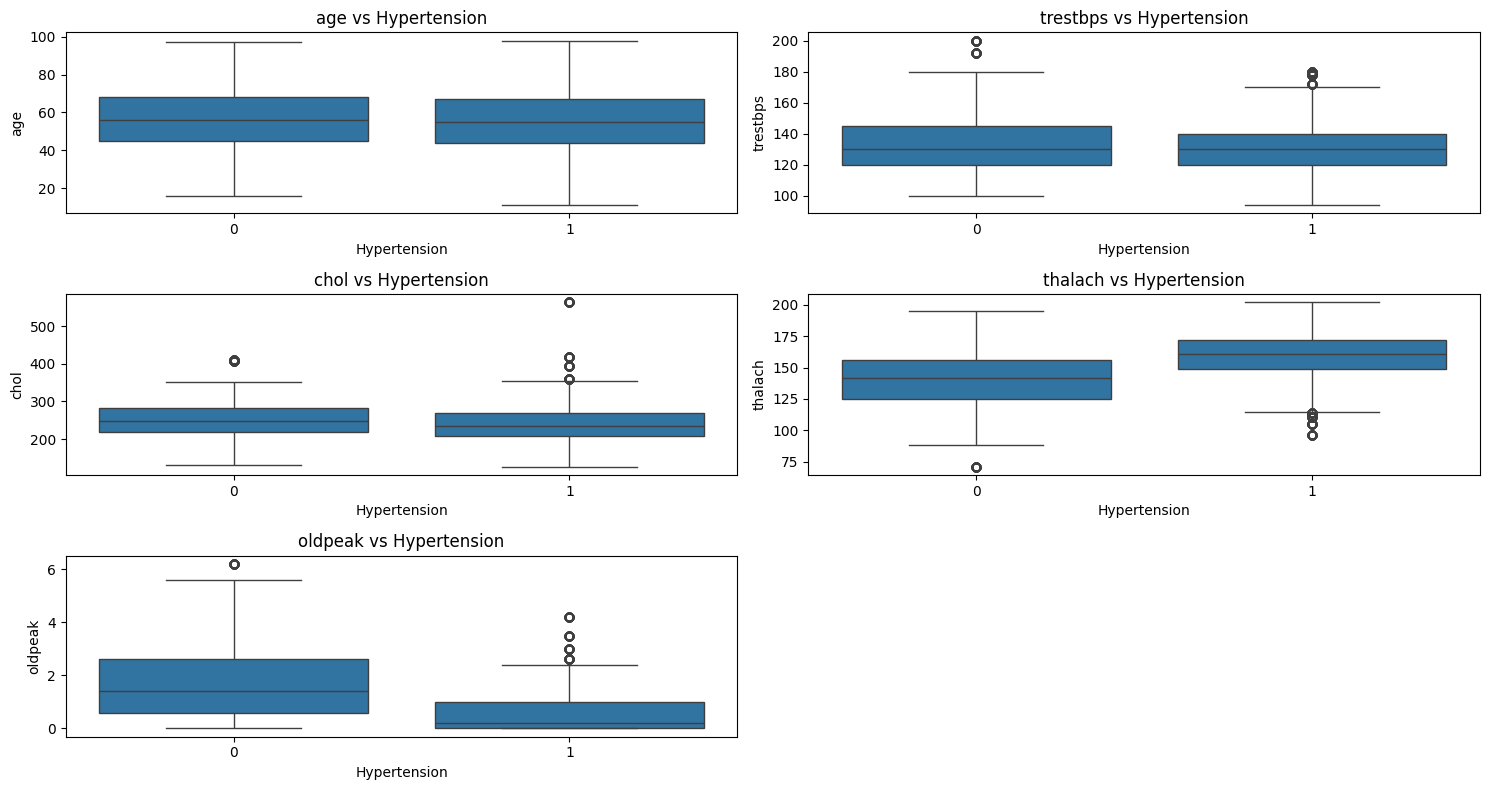

In [86]:
numeric_columns=["age","trestbps","chol","thalach","oldpeak"]
plt.figure(figsize=(15,8))
for i ,feature in enumerate(numeric_columns,start=1):
    plt.subplot(3,2,i)
    sns.boxplot(x="target",y=feature,data=df)
    plt.xlabel("Hypertension")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Hypertension")
plt.tight_layout()    
plt.show()   

In [87]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      57.0  1.0   3       145   233    1        0      150      0      2.3   
1      64.0  0.0   2       130   250    0        1      187      0      3.5   
2      52.0  1.0   1       130   204    0        0      172      0      1.4   
3      56.0  0.0   1       120   236    0        1      178      0      0.8   
4      66.0  0.0   0       120   354    0        1      163      1      0.6   
...     ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
26078  72.0  0.0   0       138   294    1        1      106      0      1.9   
26079  60.0  1.0   0       144   200    0        0      126      1      0.9   
26080  68.0  1.0   0       100   234    0        1      156      0      0.1   
26081  67.0  1.0   1       154   232    0        0      164      0      0.0   
26082  67.0  0.0   1       130   236    0        0      174      0      0.0   

       slope  ca  thal  target  
0          0   0     1       1  
1          0   0     2       1  
2          2   0     2       1  
3          2   0     2       1  
4          2   0     2       1  
...      ...  ..   ...     ...  
26078      1   3     2       0  
26079      1   0     3       0  
26080      2   1     3       0  
26081      2   1     2       0  
26082      1   1     2       0  

[25904 rows x 14 columns]

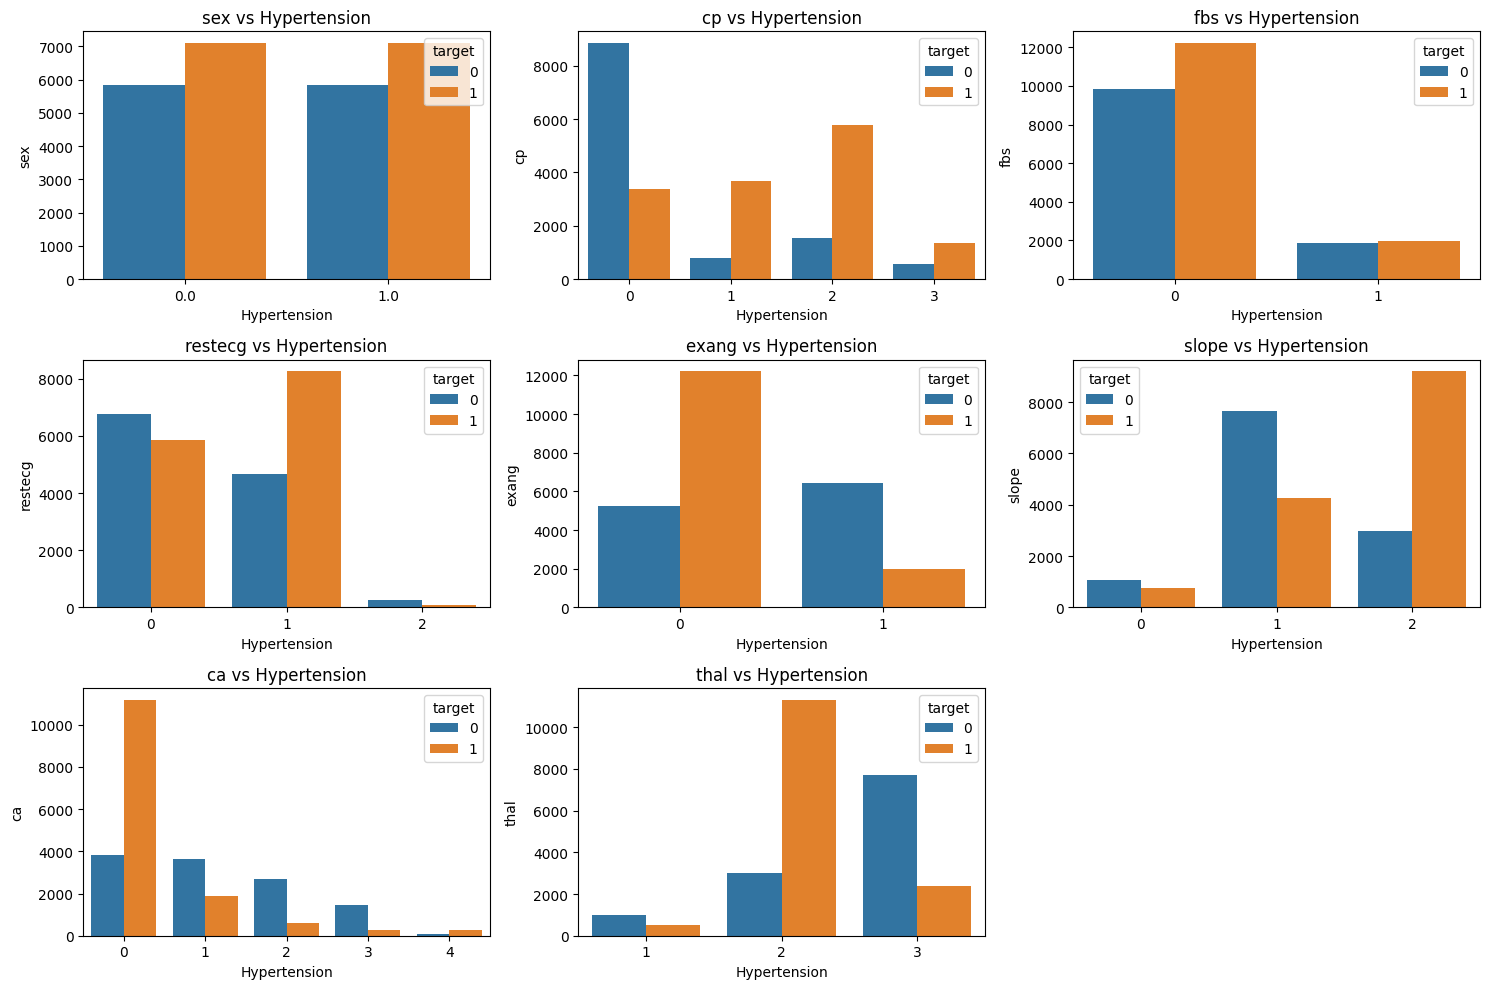

In [88]:
categorical=["sex","cp","fbs","restecg","exang","slope","ca","thal"]
plt.figure(figsize=(15,10))
for i ,feature in enumerate(categorical,start=1):
    plt.subplot(3,3,i)
    sns.countplot(x=feature,hue="target",data=df)
    plt.xlabel("Hypertension")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Hypertension")
plt.tight_layout()    
plt.show()   

<Figure size 1500x900 with 0 Axes>

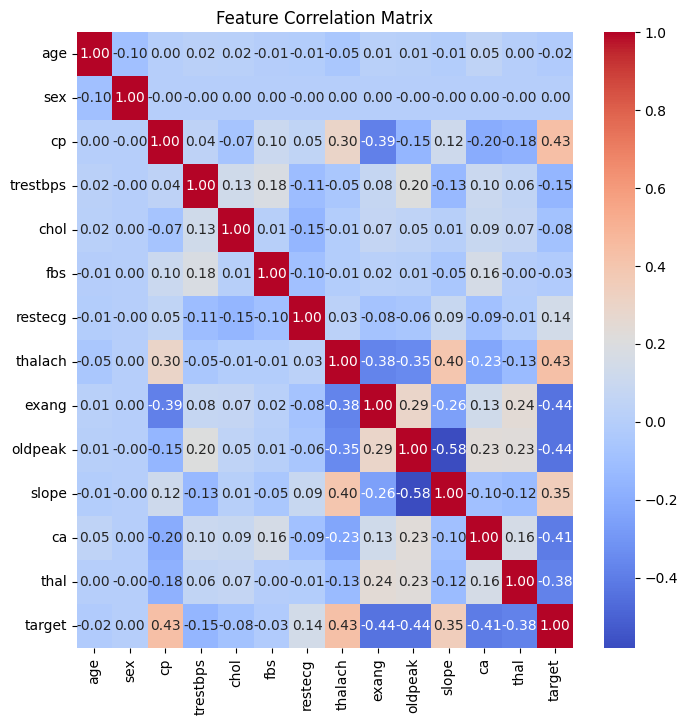

target      1.000000e+00
cp          4.337517e-01
thalach     4.273877e-01
slope       3.482840e-01
restecg     1.436060e-01
sex         4.160471e-16
age        -2.334889e-02
fbs        -2.504455e-02
chol       -8.481155e-02
trestbps   -1.491204e-01
thal       -3.805388e-01
ca         -4.077113e-01
exang      -4.355181e-01
oldpeak    -4.383166e-01
Name: target, dtype: float64


In [89]:
plt.figure(figsize=(15,9))

correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

print(correlation_matrix["target"].sort_values(ascending=False))
plt.show()

# Preprocessing

# Data Scaling

In [90]:
scaler = StandardScaler()
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "fbs", "exang"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Splite Data 

In [91]:

X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [92]:
model = Sequential([


     Dense(1024, activation="relu", input_shape=(X_train.shape[1],)),
     Dense(512, activation="relu"),
     Dropout(0.2),
     Dense(256, activation="relu"),
     Dense(128, activation="relu"),
     Dropout(0.2),
     Dense(64, activation="relu"),
     BatchNormalization(),

     Dense(1, activation="sigmoid")  
])

model.compile(optimizer=Adamax(0.01), loss="binary_crossentropy", metrics=["accuracy"])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 711,937 (2.72 MB)

 Trainable params: 711,809 (2.72 MB)

 Non-trainable params: 128 (512.00 B)

In [99]:
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.15, verbose=1)




Epoch 1/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9988 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 1.0356e-05
Epoch 2/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 3.9836e-04
Epoch 3/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.3458e-06
Epoch 4/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 1.0000 - loss: 2.8957e-04 - val_accuracy: 1.0000 - val_loss: 7.5893e-07
Epoch 5/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9990 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 2.7440e-05
Epoch 6/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9994 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 8.8948e-06
Epoch 7/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9990 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 1.6776e-05
Epoch 8/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - ac

In [100]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy  {test_acc:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2513e-05
Test Accuracy  1.0000


In [101]:
# Save the model
model.save("C:/Users/MINA/Downloads/modelll.h5")


In [102]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  

print(" **Classification Report:**\n")
print(classification_report(y_test, y_pred, target_names=["No Disease (0)", "Disease (1)"]))




162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
 **Classification Report:**

                precision    recall  f1-score   support

No Disease (0)       1.00      1.00      1.00      2302
   Disease (1)       1.00      1.00      1.00      2879

      accuracy                           1.00      5181
     macro avg       1.00      1.00      1.00      5181
  weighted avg       1.00      1.00      1.00      5181



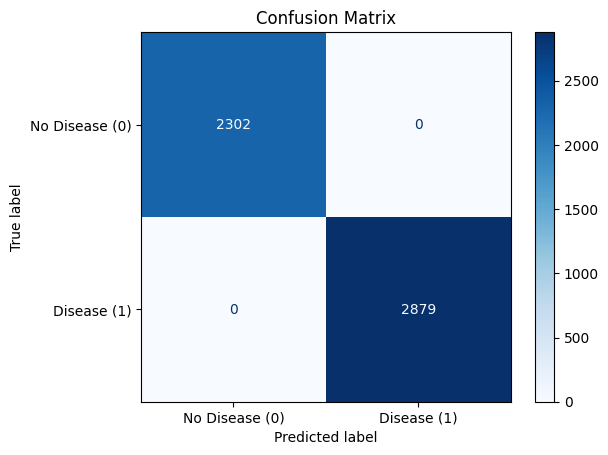

In [103]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease (0)", "Disease (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
